### Installation of packages

In [1]:
pip install tensorflow

You should consider upgrading via the '/home/studio-lab-user/.conda/envs/default/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Unzip the compressed folder consists of the train and test data of 7 classes

In [47]:
!unzip face_emotion_3.zip

Archive:  face_emotion_3.zip
   creating: face_emotion_5/train/
   creating: face_emotion_5/train/angry/
 extracting: face_emotion_5/train/angry/0.jpg  
 extracting: face_emotion_5/train/angry/1.jpg  
 extracting: face_emotion_5/train/angry/10.jpg  
 extracting: face_emotion_5/train/angry/10002.jpg  
 extracting: face_emotion_5/train/angry/10016.jpg  
 extracting: face_emotion_5/train/angry/10037.jpg  
 extracting: face_emotion_5/train/angry/10038.jpg  
 extracting: face_emotion_5/train/angry/10057.jpg  
 extracting: face_emotion_5/train/angry/10063.jpg  
 extracting: face_emotion_5/train/angry/10069.jpg  
 extracting: face_emotion_5/train/angry/10100.jpg  
 extracting: face_emotion_5/train/angry/10105.jpg  
 extracting: face_emotion_5/train/angry/10115.jpg  
 extracting: face_emotion_5/train/angry/10122.jpg  
 extracting: face_emotion_5/train/angry/10142.jpg  
 extracting: face_emotion_5/train/angry/1015.jpg  
 extracting: face_emotion_5/train/angry/10154.jpg  
 extracting: face_emoti

### Importing Required Packages

In [178]:
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import os
from PIL import Image
import glob

# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import math

## Data Preparation

### Path of the directory is assigned to `face_dir`. Each image should be of size 48 * 48 

In [2]:
image_size = 48

face_dir = "face_emotion_5/"

### Assigning the path of `train` and `test` subfolders to `train_dir` and `test_dir`

In [3]:
train_dir = os.path.join(face_dir, "train")
test_dir = os.path.join(face_dir, "validation")

### Number of classes in train and validation datasets

In [4]:
print(f'No of classes : {len(os.listdir(train_dir))}')
print(f'No of Classes : {len(os.listdir(test_dir))}')   

No of classes : 3
No of Classes : 3


### Count of images of each emotion in Training dataset

In [5]:
emo_list =[]
train_size = 0
expressions = glob.glob('face_emotion_5/train')
for expression in expressions:
    emo_list.extend([f for f in glob.glob(expression + "/*", recursive=True)])
for emotion in emo_list:
    train_size += int(len(os.listdir(emotion)))
    print(f'Image of {emotion} : {len(os.listdir(emotion))}')
print(train_size)


Image of face_emotion_5/train/angry : 3993
Image of face_emotion_5/train/neutral : 4982
Image of face_emotion_5/train/sad : 4938
13913


### Count of images of each emotion in validation dataset


In [6]:
emo_test_list =[]
test_size = 0
expressions = glob.glob('face_emotion_5/validation')
for expression in expressions:
    emo_test_list.extend([f for f in glob.glob(expression + "/*", recursive=True)])
for emotion in emo_test_list:
    test_size += int(len(os.listdir(emotion)))
    print(f'Image of {emotion} : {len(os.listdir(emotion))}')
print(test_size)

Image of face_emotion_5/validation/angry : 960
Image of face_emotion_5/validation/neutral : 1216
Image of face_emotion_5/validation/sad : 1139
3315


### Plotting the images from the dataset Randomly

In [7]:
import random
def plot_images(source_path):
    images_list =[]
    expressions = glob.glob(source_path + '/*')
    for expression in expressions:
        images_list.extend([f for f in glob.glob(expression + "/*", recursive=True)])
    random.shuffle(images_list)
    plt.figure(figsize=(12, 12))
    for i in range(1,20):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        img = image.load_img(images_list[i], target_size=(image_size, image_size))
        plt.imshow(img)
    plt.show()

### calling the plot_images function by passing `train_dir` as path

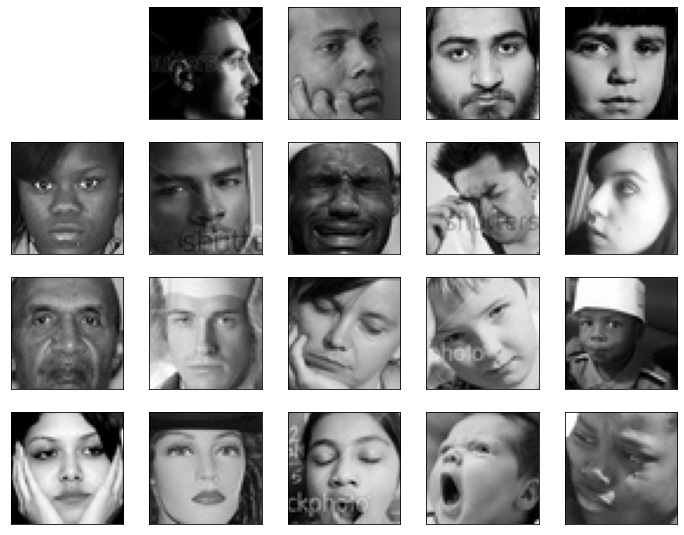

In [8]:
plot_images(train_dir)


### calling the plot_images function by passing `test_dir` as path

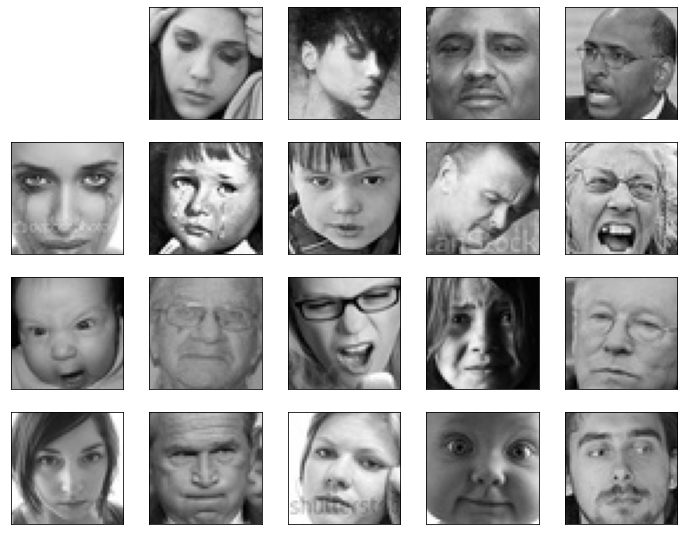

In [9]:
plot_images(test_dir)

### Function for displaying the emotion according to the expression passing as argument

In [10]:
def plot_image_acc_emotion(face_exp):
    plt.figure(figsize= (12,12))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i)
        img = load_img(face_dir+"/train/"+face_exp+"/"+
                      os.listdir(face_dir + "/train/" + face_exp)[i], target_size=(image_size, image_size))
        plt.imshow(img)   
    plt.show()

### PLot the images based on the emotion 'happy' which is of highest number 

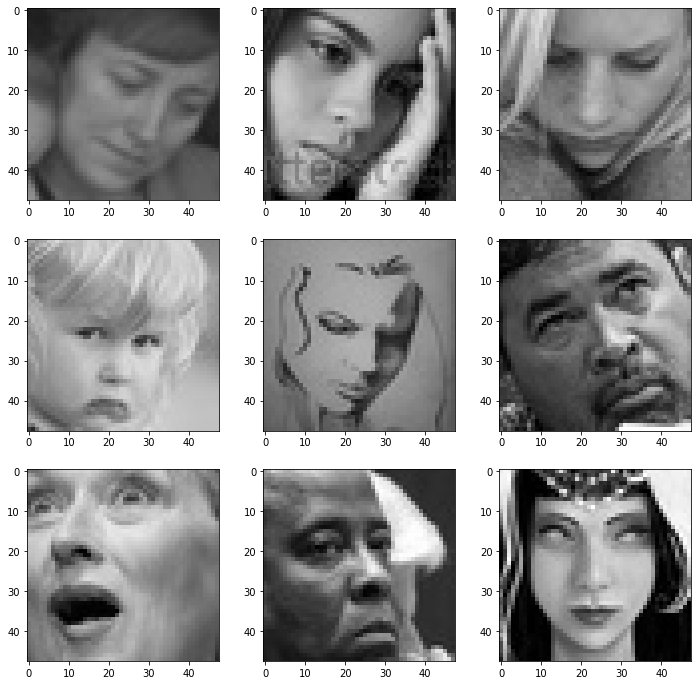

In [11]:
plot_image_acc_emotion('sad')

### PLot the images based on the emotion 'fear'

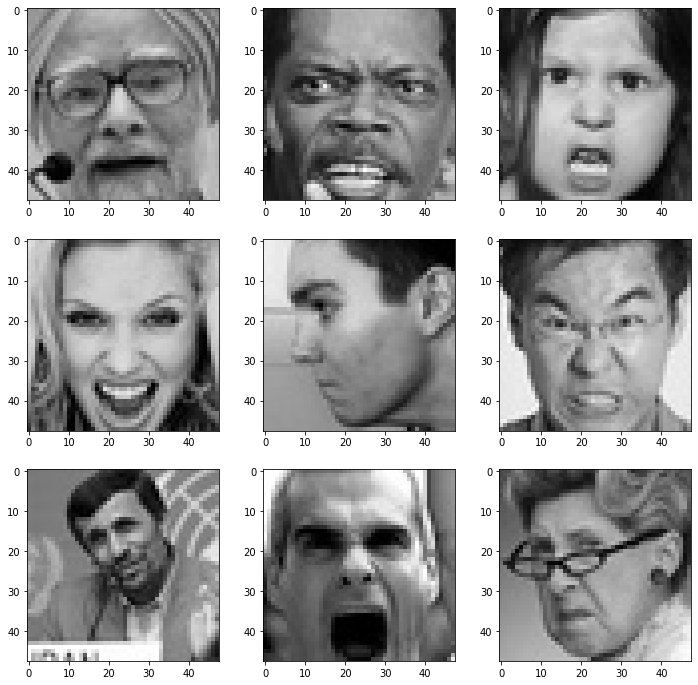

In [12]:
plot_image_acc_emotion('angry')

## Data Augmentation

### Total Images of different emotions varies, So, to balance the data, imagedatagenerator is used through which, new images will be generated according to the parameters. In training set , I split as 80:20; training:validation for testing purpose.


In [13]:
train_image_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
)

test_image_datagen = ImageDataGenerator(rescale=1./255)

### `flow_from_directory` used to read the images from the train directory path mentioned as parameter abd create two subdirectories 'training', 'validation' and stores into two different variables.

In [14]:
train_image_generator = train_image_datagen.flow_from_directory(train_dir,
        target_size=(image_size, image_size),
        batch_size=128,
        class_mode='categorical',
        color_mode = "grayscale",
        subset = 'training',                                                    
        shuffle = True)

valid_image_generator = train_image_datagen.flow_from_directory(train_dir,
        target_size=(image_size, image_size),
        batch_size=128,
        class_mode='categorical',
        color_mode = "grayscale",
        subset = 'validation' ,                                                       
        shuffle = False)


Found 11132 images belonging to 3 classes.
Found 2781 images belonging to 3 classes.


### `flow_from_directory` used to read the images from the train directory path mentioned as parameter.

In [16]:
test_image_generator = test_image_datagen.flow_from_directory(test_dir,
        target_size=(image_size, image_size),
        batch_size=128,
        class_mode='categorical',
        color_mode = "grayscale",
        shuffle = True)

Found 3315 images belonging to 3 classes.


## CNN Model Building

## Create a Sequential model using Convolutional Neural Networks

In [17]:
model=Sequential()

#conv-1

model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#2 -conv layer

model.add(Conv2D(128,(5,5),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
#3 -conv layer

model.add(Conv2D(512,(3,3),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#4 -conv layer

model.add(Conv2D(512,(3,3),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(512))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(3,activation='softmax'))


In [204]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

### Modelcheckpoint , EarlyStopping are imported from Keras library (callbacks) used to monitor the accuracy and loss during the Model Training and helps in stopping the model training when there is no change in accuracy or loss as mentioned in parameter

In [19]:
checkpoint = ModelCheckpoint("./face_emotion.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]


### Compile the model and specify loss funtion, optimizer, and learning rate

In [28]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= Adam(learning_rate=0.0005))

In [ ]:
class_weights = {
                0: 1.06,
                1: 1.03,
                2: 0.85,
                3: 0.85,
                4: 1.32
            }

### Training the dataset with the model by passing `train_image_generator` and `valid_image_generator` , `epochs` and `callbacks` as parameters

In [29]:
epochs = 50
history = model.fit(train_image_generator, 
                    epochs=epochs,
                    validation_data = valid_image_generator,
                    callbacks = callbacks_list)

Epoch 1/50
87/87 [==============================] - 217s 2s/step - loss: 1.1760 - accuracy: 0.4137 - val_loss: 1.1595 - val_accuracy: 0.3549 - lr: 5.0000e-04
Epoch 2/50
87/87 [==============================] - 215s 2s/step - loss: 1.0910 - accuracy: 0.4587 - val_loss: 1.1798 - val_accuracy: 0.3599 - lr: 5.0000e-04
Epoch 3/50
87/87 [==============================] - 213s 2s/step - loss: 1.0231 - accuracy: 0.5053 - val_loss: 1.1571 - val_accuracy: 0.3596 - lr: 5.0000e-04
Epoch 4/50
87/87 [==============================] - 216s 2s/step - loss: 0.9591 - accuracy: 0.5491 - val_loss: 1.0370 - val_accuracy: 0.4639 - lr: 5.0000e-04
Epoch 5/50
87/87 [==============================] - 215s 2s/step - loss: 0.8994 - accuracy: 0.5855 - val_loss: 0.9843 - val_accuracy: 0.5063 - lr: 5.0000e-04
Epoch 6/50
87/87 [==============================] - 213s 2s/step - loss: 0.8693 - accuracy: 0.6095 - val_loss: 0.9284 - val_accuracy: 0.5466 - lr: 5.0000e-04
Epoch 7/50
87/87 [==============================] - 

In [67]:
model.save('face_emotion_c.h5')


In [31]:
def plot_training_history(h):
    acc = h.history['accuracy']
    loss = h.history['loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    if 'val_accuracy' in h.history:
        val_acc = h.history['val_accuracy']
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    if 'val_loss' in h.history:
        val_loss = h.history['val_loss']
        plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.show()

### Initial Training and Validation Accuracy , Loss Graph

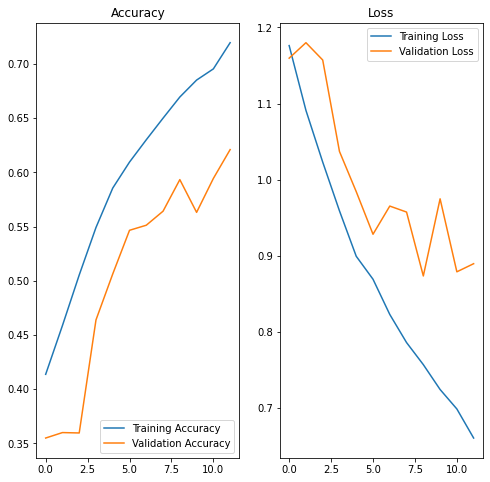

In [32]:
plot_training_history(history)


### `Evaluate` function is used for the evaluation of `test_image_generator` using CNN Model

#### Accuracy and Loss for Test data at different iterations

In [83]:
test_loss, test_accuracy = model.evaluate(test_image_generator)
print("test_loss: %f, test_accuracy: %f" % (test_loss, test_accuracy))

26/26 [==============================] - 11s 430ms/step - loss: 0.8549 - accuracy: 0.6075
test_loss: 0.854945, test_accuracy: 0.607542


In [34]:
test_loss, test_accuracy = model.evaluate(test_image_generator)
print("test_loss: %f, test_accuracy: %f" % (test_loss, test_accuracy))

26/26 [==============================] - 11s 423ms/step - loss: 0.8637 - accuracy: 0.6087
test_loss: 0.863679, test_accuracy: 0.608748


### `class_indices` is used extract dictionary of the types of emotions as key and each emotion is assigned with a number. I extracted the keys from dictionary which are emotion names and assigned to a  list `emotion_names`

In [35]:
labels = test_image_generator.class_indices
emotion_names = list(labels.keys())
print(emotion_names)

['angry', 'neutral', 'sad']


### Passing the `test_image_generator` as argument to `predict` func and test with the model. After by using `argmax` , classes with highest probablity are produced in a array.

In [36]:
Y_pred = model.predict(test_image_generator)
y_pred = np.argmax(Y_pred, axis=1)

### Using sklearn library , generated a confusion matrix using test set class and the Y-Pred

In [86]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cf_matrix = confusion_matrix(test_image_generator.classes, y_pred)
print(cf_matrix)
print(classification_report(test_image_generator.classes, y_pred, target_names=emotion_names))

Confusion Matrix
[[190 350 420]
 [271 422 523]
 [208 407 524]]
              precision    recall  f1-score   support

       angry       0.28      0.20      0.23       960
     neutral       0.36      0.35      0.35      1216
         sad       0.36      0.46      0.40      1139

    accuracy                           0.34      3315
   macro avg       0.33      0.34      0.33      3315
weighted avg       0.34      0.34      0.33      3315



In [42]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cf_matrix = confusion_matrix(test_image_generator.classes, y_pred)
print(cf_matrix)
print(classification_report(test_image_generator.classes, y_pred, target_names=emotion_names))

Confusion Matrix
[[196 376 388]
 [235 431 550]
 [225 428 486]]
              precision    recall  f1-score   support

       angry       0.30      0.20      0.24       960
     neutral       0.35      0.35      0.35      1216
         sad       0.34      0.43      0.38      1139

    accuracy                           0.34      3315
   macro avg       0.33      0.33      0.32      3315
weighted avg       0.33      0.34      0.33      3315



In [44]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cf_matrix_n = confusion_matrix(test_image_generator.classes, y_pred,normalize = 'true')
print(cf_matrix_n)
print(classification_report(test_image_generator.classes, y_pred, target_names=emotion_names))

Confusion Matrix
[[0.20416667 0.39166667 0.40416667]
 [0.19325658 0.35444079 0.45230263]
 [0.1975417  0.37576822 0.42669008]]
              precision    recall  f1-score   support

       angry       0.30      0.20      0.24       960
     neutral       0.35      0.35      0.35      1216
         sad       0.34      0.43      0.38      1139

    accuracy                           0.34      3315
   macro avg       0.33      0.33      0.32      3315
weighted avg       0.33      0.34      0.33      3315



### Visualization of Confusion Matrix

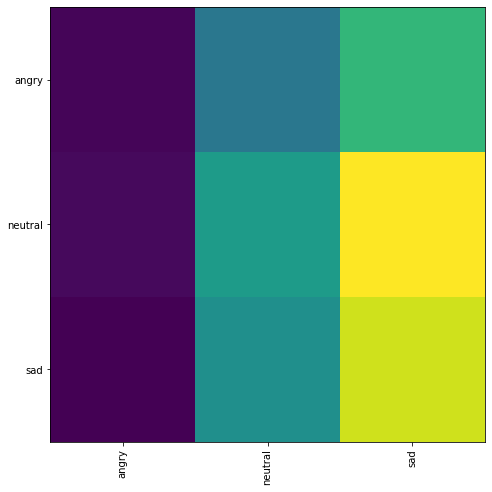

In [205]:
plt.figure(figsize=(8,8))
plt.imshow(cf_matrix, interpolation='nearest')
tick_marks = np.arange(len(emotion_names))
_ = plt.xticks(tick_marks, emotion_names, rotation=90)
_ = plt.yticks(tick_marks, emotion_names)

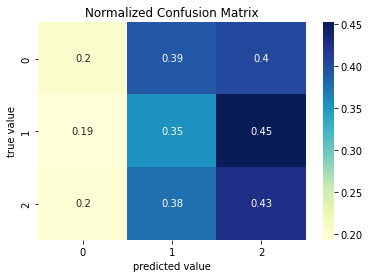

In [41]:
plt.figure()
sns.heatmap(cf_matrix, cmap="YlGnBu", annot=True, fmt='.2g');
plt.xlabel('predicted value')
plt.ylabel('true value');
plt.title("Normalized Confusion Matrix");


#### Learning rate changed from 0.0005 to 1e-5

In [64]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= Adam(learning_rate=1e-5))

In [49]:
epochs = 40
history = model.fit(train_image_generator, 
                    epochs=epochs,
                    validation_data = valid_image_generator,
                    callbacks = callbacks_list)

Epoch 1/40
87/87 [==============================] - 216s 2s/step - loss: 0.6953 - accuracy: 0.7027 - val_loss: 0.8577 - val_accuracy: 0.6199 - lr: 1.0000e-05
Epoch 2/40
87/87 [==============================] - 214s 2s/step - loss: 0.6828 - accuracy: 0.7108 - val_loss: 0.8515 - val_accuracy: 0.6296 - lr: 1.0000e-05
Epoch 3/40
87/87 [==============================] - 214s 2s/step - loss: 0.6744 - accuracy: 0.7139 - val_loss: 0.8464 - val_accuracy: 0.6293 - lr: 1.0000e-05
Epoch 4/40
87/87 [==============================] - 215s 2s/step - loss: 0.6717 - accuracy: 0.7151 - val_loss: 0.8433 - val_accuracy: 0.6318 - lr: 1.0000e-05
Epoch 5/40
87/87 [==============================] - 216s 2s/step - loss: 0.6693 - accuracy: 0.7174 - val_loss: 0.8427 - val_accuracy: 0.6336 - lr: 1.0000e-05
Epoch 6/40
87/87 [==============================] - 219s 3s/step - loss: 0.6713 - accuracy: 0.7142 - val_loss: 0.8431 - val_accuracy: 0.6357 - lr: 1.0000e-05
Epoch 7/40
87/87 [==============================] - 

In [168]:
model.save('face_emotion_d.h5')

#### Plotting line graph for Train and Test Accuaracy , Loss using matplotlib library

In [201]:
def plot_training_history(h):
    acc = h.history['accuracy']
    loss = h.history['loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    if 'val_accuracy' in h.history:
        val_acc = h.history['val_accuracy']
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    if 'val_loss' in h.history:
        val_loss = h.history['val_loss']
        plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.show()

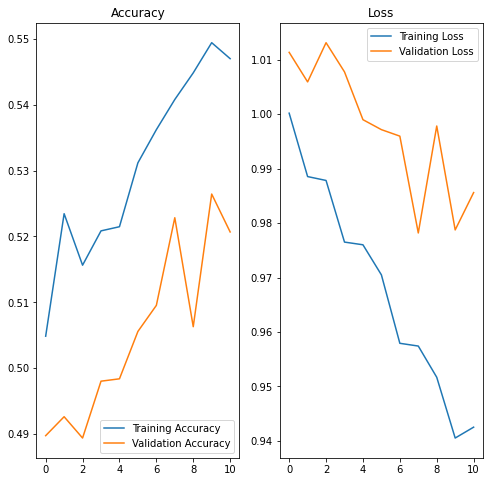

In [202]:
plot_training_history(history)

#### Evaluating the test data after increasing the learning rate as validation loss is more than training loss and accuracy is 0.64 and loss 0.84 

In [203]:

test_loss, test_accuracy = model.evaluate(test_image_generator)
print("test_loss: %f, test_accuracy: %f" % (test_loss, test_accuracy))

26/26 [==============================] - 12s 439ms/step - loss: 1.0222 - accuracy: 0.4790
test_loss: 1.022158, test_accuracy: 0.479035


#### Generating the class names and appedning to a list using `.class_indices`

In [52]:
labels = test_image_generator.class_indices
emotion_names = list(labels.keys())
print(emotion_names)

['angry', 'neutral', 'sad']


### Passing the `test_image_generator` as argument to `predict` func and test with the model. After by using `argmax` , classes with highest probablity are produced in a array.

In [134]:
Y_pred = model.predict(test_image_generator)
y_pred = np.argmax(Y_pred, axis=1)

### Using sklearn library , generated a confusion matrix and classification_report using test set class and the y_pred

In [54]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cf_matrix = confusion_matrix(test_image_generator.classes, y_pred)
print(cf_matrix)
print(classification_report(test_image_generator.classes, y_pred, target_names=emotion_names))

Confusion Matrix
[[241 352 367]
 [284 484 448]
 [267 470 402]]
              precision    recall  f1-score   support

       angry       0.30      0.25      0.28       960
     neutral       0.37      0.40      0.38      1216
         sad       0.33      0.35      0.34      1139

    accuracy                           0.34      3315
   macro avg       0.34      0.33      0.33      3315
weighted avg       0.34      0.34      0.34      3315



#### Using sklearn library , generated a confusion matrix by enabling normalization for better visualization

In [57]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cf_matrix_n = confusion_matrix(test_image_generator.classes, y_pred,normalize='true')
print(cf_matrix_n)

Confusion Matrix
[[0.25104167 0.36666667 0.38229167]
 [0.23355263 0.39802632 0.36842105]
 [0.23441615 0.41264267 0.35294118]]
              precision    recall  f1-score   support

       angry       0.30      0.25      0.28       960
     neutral       0.37      0.40      0.38      1216
         sad       0.33      0.35      0.34      1139

    accuracy                           0.34      3315
   macro avg       0.34      0.33      0.33      3315
weighted avg       0.34      0.34      0.34      3315



#### Visualization of Confusion Matrix

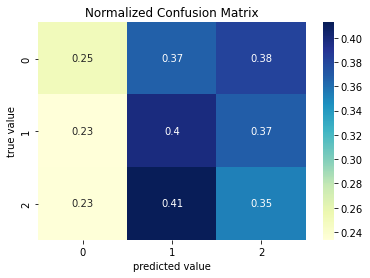

In [59]:
plt.figure()
sns.heatmap(cf_matrix_n, cmap="YlGnBu", annot=True, fmt='.2g');
plt.xlabel('predicted value')
plt.ylabel('true value');
plt.title("Normalized Confusion Matrix");

In [63]:
model=Sequential()

#conv-1

model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#2 -conv layer

model.add(Conv2D(128,(5,5),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
#3 -conv layer

model.add(Conv2D(512,(3,3),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#4 -conv layer

model.add(Conv2D(512,(3,3),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(512))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(3,activation='softmax'))

#### Learning rate decreased to 1e-4 from 1e-3 as validation loss is more than training loss to reduce overfitting and later learning rate reduced to 1e-3 where validation accuracy and training accuracy both reduced rapidly.Considering the model that compiled with optimizer of learning rate 1e-5 for better results

In [131]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= Adam(learning_rate=1e-4))

In [132]:
epochs = 50
history = model.fit(train_image_generator, 
                    epochs=epochs,
                    validation_data = valid_image_generator,
                    callbacks = callbacks_list)

Epoch 1/50
87/87 [==============================] - 225s 3s/step - loss: 1.0002 - accuracy: 0.5049 - val_loss: 1.0113 - val_accuracy: 0.4898 - lr: 1.0000e-04
Epoch 2/50
87/87 [==============================] - 223s 3s/step - loss: 0.9885 - accuracy: 0.5234 - val_loss: 1.0059 - val_accuracy: 0.4926 - lr: 1.0000e-04
Epoch 3/50
87/87 [==============================] - 224s 3s/step - loss: 0.9878 - accuracy: 0.5156 - val_loss: 1.0131 - val_accuracy: 0.4894 - lr: 1.0000e-04
Epoch 4/50
87/87 [==============================] - 224s 3s/step - loss: 0.9765 - accuracy: 0.5208 - val_loss: 1.0077 - val_accuracy: 0.4980 - lr: 1.0000e-04
Epoch 5/50
87/87 [==============================] - 225s 3s/step - loss: 0.9760 - accuracy: 0.5215 - val_loss: 0.9990 - val_accuracy: 0.4984 - lr: 1.0000e-04
Epoch 6/50
87/87 [==============================] - 223s 3s/step - loss: 0.9705 - accuracy: 0.5312 - val_loss: 0.9971 - val_accuracy: 0.5056 - lr: 1.0000e-04
Epoch 7/50
87/87 [==============================] - 

In [166]:
def plot_training_history(h):
    acc = h.history['accuracy']
    loss = h.history['loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    if 'val_accuracy' in h.history:
        val_acc = h.history['val_accuracy']
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    if 'val_loss' in h.history:
        val_loss = h.history['val_loss']
        plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.show()

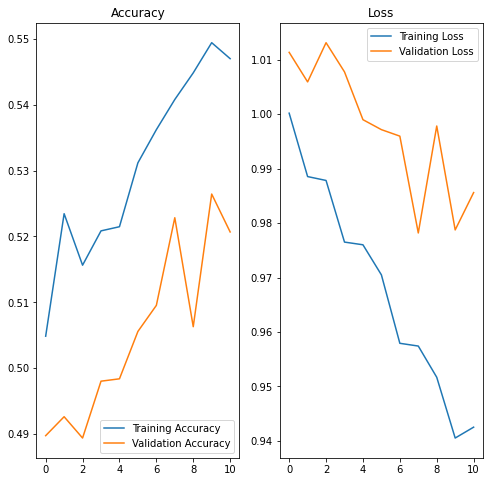

In [167]:
plot_training_history(history)

#### Evaluating the test data after increasing the learning rate as validation loss is more than training loss and accuracy is 0.52 and loss 0.97 

In [135]:
test_loss, test_accuracy = model.evaluate(test_image_generator)
print("test_loss: %f, test_accuracy: %f" % (test_loss, test_accuracy))

26/26 [==============================] - 11s 423ms/step - loss: 0.9781 - accuracy: 0.5282
test_loss: 0.978058, test_accuracy: 0.528205


### Passing the `test_image_generator` as argument to `predict` func and test with the model. After by using `argmax` , classes with highest probablity are produced in a array.

In [136]:
Y_pred = model.predict(test_image_generator)
y_pred = np.argmax(Y_pred, axis=1)

In [207]:
### Using sklearn library , generated a confusion matrix and classification_report using test set class and the y_pred

In [137]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cf_matrix = confusion_matrix(test_image_generator.classes, y_pred)
print(cf_matrix)
print(classification_report(test_image_generator.classes, y_pred, target_names=emotion_names))

Confusion Matrix
[[144 340 476]
 [151 418 647]
 [138 391 610]]
              precision    recall  f1-score   support

       angry       0.33      0.15      0.21       960
     neutral       0.36      0.34      0.35      1216
         sad       0.35      0.54      0.42      1139

    accuracy                           0.35      3315
   macro avg       0.35      0.34      0.33      3315
weighted avg       0.35      0.35      0.34      3315



In [208]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cf_matrix_n = confusion_matrix(test_image_generator.classes, y_pred, normalize='true')
print(cf_matrix_n)


Confusion Matrix
[[0.15       0.35416667 0.49583333]
 [0.12417763 0.34375    0.53207237]
 [0.12115891 0.34328358 0.53555751]]


#### Visualization of Confusion matrix

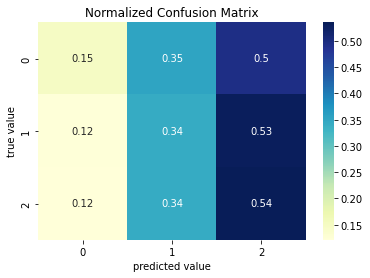

In [209]:
plt.figure()
sns.heatmap(cf_matrix_n, cmap="YlGnBu", annot=True, fmt='.2g');
plt.xlabel('predicted value')
plt.ylabel('true value');
plt.title("Normalized Confusion Matrix");

#### Image path is passed as a parameter to `predict_label` function , image is resized , converted into a array and reshaped using keras library functions
#### Predict the Image using the sequential model and try to fetch the max values based on the frequency of its occurance.Fetch the max prediction index value
#### Extract the 0th position of the array which is a list
#### Return the value at index position retrieved from above statement in `emotion_names`

In [155]:
def predict_label(img_path):
    img = image.load_img(img_path, target_size=(48,48))
    img = image.img_to_array(img)/255.0
    img = img.reshape(3, 48,48,1)
    prediction = model.predict(img)
    prediction = np.argmax(prediction,axis=0)
    pred = max(prediction)
    p = np.where(prediction == pred)
    pred = p[0]
    return emotion_names[int(pred)]


In [210]:
model.save('face_emotion_f.h5')

#### Angry Image Prediction

Face Expression : angry


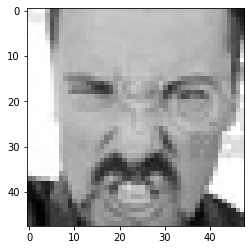

In [224]:
img = '1717.jpg'
img = image.load_img(img,target_size=(image_size,image_size))
plt.imshow(img)
p = predict_label('1717.jpg')
print(f'Face Expression : {p}')


#### Neutral Image Prediction

Face Expression : neutral


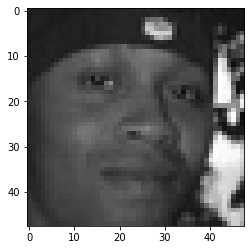

In [219]:
img = 'Neutral-1004.jpg'
img = image.load_img(img)
plt.imshow(img)
p = predict_label('Neutral-1004.jpg')
print(f'Face Expression : {p}')

#### Sad Image Prediction

Face Expression : sad


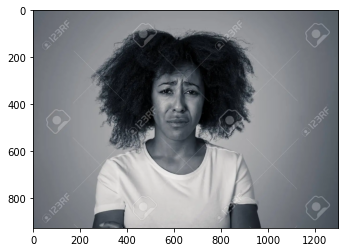

In [218]:
img = 'sad_women.jpg'
img = image.load_img(img)
plt.imshow(img)
p = predict_label('sad_women.jpg')
print(f'Face Expression : {p}')